In [1]:
import re
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from plotly.graph_objs import Figure, Histogram, Layout

In [2]:
countries = ['US', 'DE', 'CA', 'FR', 'GB', 'IN', 'JP', 'KR', 'MX', 'RU']
dframes = [code.lower()+'_df' for code in countries]

cat_ids = pd.read_csv('yt category list.csv', delimiter=' - ', engine='python')
for code, df in zip(countries, dframes):
    globals()[df] = pd.read_csv(f'{code}videos.csv', parse_dates=['trending_date', 'publish_time'], \
                                encoding_errors='ignore').merge(cat_ids, on='category_id', how='inner')
    globals()[df] = globals()[df].drop(['category_id', 'thumbnail_link'], axis=1)

In [3]:
us_df.head()

,video_id,trending_date,title,channel_title,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,category
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,2017-11-13 17:13:01+00:00,SHANtell martin,748374,57527,2966,15954,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs
1,0mlNzVSJrT0,17.14.11,Me-O Cats Commercial,Nobrand,2017-04-21 06:47:32+00:00,"cute|""cats""|""thai""|""eggs""",98966,2486,184,532,False,False,False,Kittens come out of the eggs in a Thai commerc...,People & Blogs
2,STI2fI7sKMo,17.14.11,"AFFAIRS, EX BOYFRIENDS, $18MILLION NET WORTH -...",Shawn Johnson East,2017-11-11 15:00:03+00:00,"shawn johnson|""andrew east""|""shawn east""|""shaw...",321053,4451,1772,895,False,False,False,Subscribe for weekly videos ▶ http://bit.ly/sj...,People & Blogs
3,KODzih-pYlU,17.14.11,BLIND(folded) CAKE DECORATING CONTEST (with Mo...,Grace Helbig,2017-11-11 18:08:04+00:00,"itsgrace|""funny""|""comedy""|""vlog""|""grace""|""helb...",197062,7250,217,456,False,False,False,Molly is an god damn amazing human and she cha...,People & Blogs
4,8mhTWqWlQzU,17.14.11,Wearing Online Dollar Store Makeup For A Week,Safiya Nygaard,2017-11-11 01:19:33+00:00,wearing online dollar store makeup for a week|...,2744430,115426,1110,6541,False,False,False,I found this online dollar store called ShopMi...,People & Blogs


<AxesSubplot:xlabel='category'>

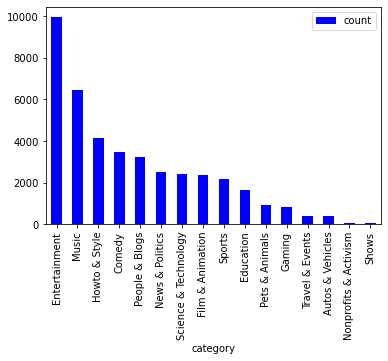

In [31]:
us_df.groupby('category').agg(count=('category', 'count'))\
.sort_values(by='count', ascending=False).plot.bar(color = 'b')

In [5]:
us_df.head()

,video_id,trending_date,title,channel_title,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,category
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,2017-11-13 17:13:01+00:00,SHANtell martin,748374,57527,2966,15954,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs
1,0mlNzVSJrT0,17.14.11,Me-O Cats Commercial,Nobrand,2017-04-21 06:47:32+00:00,"cute|""cats""|""thai""|""eggs""",98966,2486,184,532,False,False,False,Kittens come out of the eggs in a Thai commerc...,People & Blogs
2,STI2fI7sKMo,17.14.11,"AFFAIRS, EX BOYFRIENDS, $18MILLION NET WORTH -...",Shawn Johnson East,2017-11-11 15:00:03+00:00,"shawn johnson|""andrew east""|""shawn east""|""shaw...",321053,4451,1772,895,False,False,False,Subscribe for weekly videos ▶ http://bit.ly/sj...,People & Blogs
3,KODzih-pYlU,17.14.11,BLIND(folded) CAKE DECORATING CONTEST (with Mo...,Grace Helbig,2017-11-11 18:08:04+00:00,"itsgrace|""funny""|""comedy""|""vlog""|""grace""|""helb...",197062,7250,217,456,False,False,False,Molly is an god damn amazing human and she cha...,People & Blogs
4,8mhTWqWlQzU,17.14.11,Wearing Online Dollar Store Makeup For A Week,Safiya Nygaard,2017-11-11 01:19:33+00:00,wearing online dollar store makeup for a week|...,2744430,115426,1110,6541,False,False,False,I found this online dollar store called ShopMi...,People & Blogs


In [6]:
us_df['like_pct'] = us_df['likes'] / us_df['views'] * 100
us_df['len_desc'] = us_df['description'].str.split().str.len()
us_df['len_title'] = us_df['title'].str.split().str.len()
us_df['qty_tags'] = us_df['tags'].str.split('|').str.len()

us_df.head()

,video_id,trending_date,title,channel_title,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,category,like_pct,len_desc,len_title,qty_tags
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,2017-11-13 17:13:01+00:00,SHANtell martin,748374,57527,2966,15954,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs,7.686932,130.0,7,1
1,0mlNzVSJrT0,17.14.11,Me-O Cats Commercial,Nobrand,2017-04-21 06:47:32+00:00,"cute|""cats""|""thai""|""eggs""",98966,2486,184,532,False,False,False,Kittens come out of the eggs in a Thai commerc...,People & Blogs,2.511974,16.0,3,4
2,STI2fI7sKMo,17.14.11,"AFFAIRS, EX BOYFRIENDS, $18MILLION NET WORTH -...",Shawn Johnson East,2017-11-11 15:00:03+00:00,"shawn johnson|""andrew east""|""shawn east""|""shaw...",321053,4451,1772,895,False,False,False,Subscribe for weekly videos ▶ http://bit.ly/sj...,People & Blogs,1.386375,57.0,13,44
3,KODzih-pYlU,17.14.11,BLIND(folded) CAKE DECORATING CONTEST (with Mo...,Grace Helbig,2017-11-11 18:08:04+00:00,"itsgrace|""funny""|""comedy""|""vlog""|""grace""|""helb...",197062,7250,217,456,False,False,False,Molly is an god damn amazing human and she cha...,People & Blogs,3.679045,78.0,10,12
4,8mhTWqWlQzU,17.14.11,Wearing Online Dollar Store Makeup For A Week,Safiya Nygaard,2017-11-11 01:19:33+00:00,wearing online dollar store makeup for a week|...,2744430,115426,1110,6541,False,False,False,I found this online dollar store called ShopMi...,People & Blogs,4.205828,75.0,8,25


In [96]:
print(us_df['title'].str.findall(r'[A-Za-z]'))
us_df['title'].str.findall(r'[A-Za-z]').str.len()

0        [W, E, W, A, N, T, T, O, T, A, L, K, A, B, O, ...
1        [M, e, O, C, a, t, s, C, o, m, m, e, r, c, i, ...
2        [A, F, F, A, I, R, S, E, X, B, O, Y, F, R, I, ...
3        [B, L, I, N, D, f, o, l, d, e, d, C, A, K, E, ...
4        [W, e, a, r, i, n, g, O, n, l, i, n, e, D, o, ...
                               ...                        
40944    [G, a, m, e, o, f, Z, o, n, e, s, S, E, T, h, ...
40945    [G, a, m, e, o, f, Z, o, n, e, s, S, E, T, h, ...
40946    [G, a, m, e, o, f, Z, o, n, e, s, S, E, T, h, ...
40947    [G, a, m, e, o, f, Z, o, n, e, s, S, E, T, h, ...
40948    [G, a, m, e, o, f, Z, o, n, e, s, S, E, T, h, ...
Name: title, Length: 40949, dtype: object


0        28
1        17
2        56
3        57
4        38
         ..
40944    30
40945    30
40946    30
40947    30
40948    30
Name: title, Length: 40949, dtype: int64

In [98]:
pct_cap = us_df['title'].str.findall(r'[A-Z]').str.len() / us_df['title'].str.findall(r'[a-zA-Z]').str.len()

pct_cap

0        1.000000
1        0.235294
2        0.785714
3        0.526316
4        0.210526
           ...   
40944    0.266667
40945    0.266667
40946    0.266667
40947    0.266667
40948    0.266667
Name: title, Length: 40949, dtype: float64

In [7]:
us_df['trending_date'] = pd.to_datetime(us_df['trending_date'], format='%y.%d.%m')
us_df['publish_date'] = pd.to_datetime(us_df['publish_time'].dt.date)
us_df['trending_delta'] = us_df['trending_date'] - us_df['publish_date']
us_df

,video_id,trending_date,title,channel_title,publish_time,tags,views,likes,dislikes,comment_count,...,ratings_disabled,video_error_or_removed,description,category,like_pct,len_desc,len_title,qty_tags,publish_date,trending_delta
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,2017-11-13 17:13:01+00:00,SHANtell martin,748374,57527,2966,15954,...,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs,7.686932,130.0,7,1,2017-11-13,1 days
1,0mlNzVSJrT0,2017-11-14,Me-O Cats Commercial,Nobrand,2017-04-21 06:47:32+00:00,"cute|""cats""|""thai""|""eggs""",98966,2486,184,532,...,False,False,Kittens come out of the eggs in a Thai commerc...,People & Blogs,2.511974,16.0,3,4,2017-04-21,207 days
2,STI2fI7sKMo,2017-11-14,"AFFAIRS, EX BOYFRIENDS, $18MILLION NET WORTH -...",Shawn Johnson East,2017-11-11 15:00:03+00:00,"shawn johnson|""andrew east""|""shawn east""|""shaw...",321053,4451,1772,895,...,False,False,Subscribe for weekly videos ▶ http://bit.ly/sj...,People & Blogs,1.386375,57.0,13,44,2017-11-11,3 days
3,KODzih-pYlU,2017-11-14,BLIND(folded) CAKE DECORATING CONTEST (with Mo...,Grace Helbig,2017-11-11 18:08:04+00:00,"itsgrace|""funny""|""comedy""|""vlog""|""grace""|""helb...",197062,7250,217,456,...,False,False,Molly is an god damn amazing human and she cha...,People & Blogs,3.679045,78.0,10,12,2017-11-11,3 days
4,8mhTWqWlQzU,2017-11-14,Wearing Online Dollar Store Makeup For A Week,Safiya Nygaard,2017-11-11 01:19:33+00:00,wearing online dollar store makeup for a week|...,2744430,115426,1110,6541,...,False,False,I found this online dollar store called ShopMi...,People & Blogs,4.205828,75.0,8,25,2017-11-11,3 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,V6ElE2xs48c,2018-06-02,Game of Zones - S5:E5: The Isle of Van Gundy,Bleacher Report,2018-05-10 21:01:22+00:00,"bleacher report|""br""|""nba""|""Stan Van Gundy""|""J...",1324482,22413,608,1644,...,False,False,"On an island full of Van Gundys, Stan gets tal...",Shows,1.692209,36.0,10,33,2018-05-10,23 days
40945,V6ElE2xs48c,2018-06-03,Game of Zones - S5:E5: The Isle of Van Gundy,Bleacher Report,2018-05-10 21:01:22+00:00,"bleacher report|""br""|""nba""|""Stan Van Gundy""|""J...",1332252,22461,610,1648,...,False,False,"On an island full of Van Gundys, Stan gets tal...",Shows,1.685942,36.0,10,33,2018-05-10,24 days
40946,V6ElE2xs48c,2018-06-04,Game of Zones - S5:E5: The Isle of Van Gundy,Bleacher Report,2018-05-10 21:01:22+00:00,"bleacher report|""br""|""nba""|""Stan Van Gundy""|""J...",1340039,22504,615,1648,...,False,False,"On an island full of Van Gundys, Stan gets tal...",Shows,1.679354,36.0,10,33,2018-05-10,25 days
40947,V6ElE2xs48c,2018-06-05,Game of Zones - S5:E5: The Isle of Van Gundy,Bleacher Report,2018-05-10 21:01:22+00:00,"bleacher report|""br""|""nba""|""Stan Van Gundy""|""J...",1345086,22542,615,1649,...,False,False,"On an island full of Van Gundys, Stan gets tal...",Shows,1.675878,36.0,10,33,2018-05-10,26 days


In [8]:
from datetime import tzinfo, timedelta, datetime

/Users/setone/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


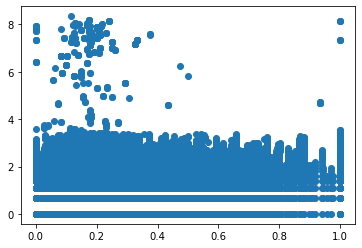

In [102]:
plt.scatter(pct_cap, np.log(us_df['trending_delta'].dt.days))

<AxesSubplot:xlabel='len_desc', ylabel='like_pct'>

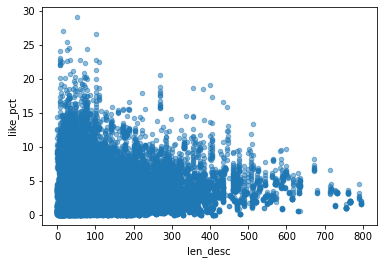

In [9]:
us_df.plot.scatter('len_desc', 'like_pct', alpha=0.5)

(array([18878., 11959.,  4708.,  2636.,  1200.,   472.,   246.,   174.,
           19.,    87.]),
 array([  0. ,  79.6, 159.2, 238.8, 318.4, 398. , 477.6, 557.2, 636.8,
        716.4, 796. ]),
 <BarContainer object of 10 artists>)

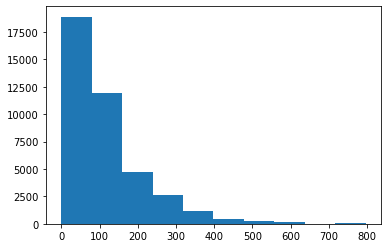

In [10]:
plt.hist(us_df['len_desc'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fa91803efa0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa9198c6640>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fa91803ecd0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fa9198c6b20>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fa9198c6df0>],
 'means': []}

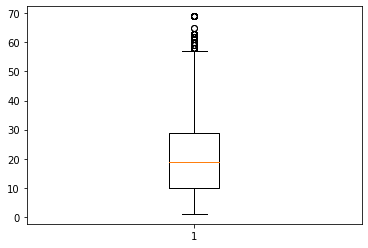

In [11]:
plt.boxplot(us_df['qty_tags'])

<AxesSubplot:>

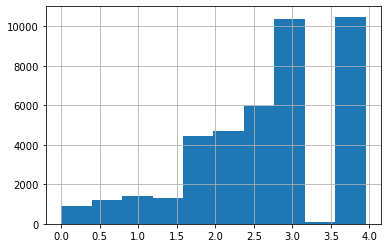

In [12]:
np.log(us_df['publish_date'].dt.isocalendar().week).hist()

<AxesSubplot:ylabel='Frequency'>

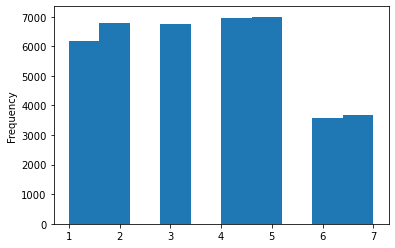

In [13]:
us_df['publish_date'].dt.isocalendar().day.plot.hist()

In [14]:
us_df[us_df['channel_title'] == 'Vox']

,video_id,trending_date,title,channel_title,publish_time,tags,views,likes,dislikes,comment_count,...,ratings_disabled,video_error_or_removed,description,category,like_pct,len_desc,len_title,qty_tags,publish_date,trending_delta
21377,TUmyygCMMGA,2017-11-14,Why the rise of the robots won’t mean the end ...,Vox,2017-11-13 13:45:16+00:00,"vox.com|""vox""|""explain""|""shift change""|""future...",256426,12654,1363,2368,...,False,False,"For now, at least, we have better things to wo...",News & Politics,4.934757,172.0,12,20,2017-11-13,1 days
21391,TUmyygCMMGA,2017-11-15,Why the rise of the robots won’t mean the end ...,Vox,2017-11-13 13:45:16+00:00,"vox.com|""vox""|""explain""|""shift change""|""future...",635985,20721,2417,4111,...,False,False,"For now, at least, we have better things to wo...",News & Politics,3.258096,172.0,12,20,2017-11-13,2 days
21403,_BVAJ3PXZ1k,2017-11-16,The all-American fruit you've probably never h...,Vox,2017-11-15 11:30:00+00:00,"vox.com|""vox""|""explain""|""pawpaw""|""paw paw""|""fr...",533940,12633,597,1828,...,False,False,"The founding fathers loved the pawpaw fruit, s...",News & Politics,2.365996,95.0,8,41,2017-11-15,1 days
21416,lJFqvRwOiis,2017-11-17,Walking while black,Vox,2017-11-16 12:55:39+00:00,"vox.com|""vox""|""explain""|""race""|""poverty""|""tick...",505886,23207,5375,7030,...,False,False,Jacksonville’s enforcement of pedestrian viola...,News & Politics,4.587397,186.0,3,35,2017-11-16,1 days
21431,5HOijUtExiM,2017-11-18,The environmental cost of free two-day shipping,Vox,2017-11-17 13:00:12+00:00,"vox.com|""vox""|""explain""|""ucla""|""environmentali...",366048,14742,1308,1948,...,False,False,What’s the environmental impact of online shop...,News & Politics,4.027341,259.0,7,33,2017-11-17,1 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23853,Nd3zqXro_P0,2018-06-10,Why 350°F is the magic number for baking,Vox,2018-06-07 12:00:02+00:00,"baking|""maillard reaction""|""s pen""|""Vox.com""|""...",621100,13749,535,1395,...,False,False,Turns out there’s a lot of chemistry in cookin...,News & Politics,2.213653,128.0,8,22,2018-06-07,3 days
23856,Nd3zqXro_P0,2018-06-11,Why 350°F is the magic number for baking,Vox,2018-06-07 12:00:02+00:00,"baking|""maillard reaction""|""s pen""|""Vox.com""|""...",673657,14433,569,1445,...,False,False,Turns out there’s a lot of chemistry in cookin...,News & Politics,2.142485,128.0,8,22,2018-06-07,4 days
23859,Nd3zqXro_P0,2018-06-12,Why 350°F is the magic number for baking,Vox,2018-06-07 12:00:02+00:00,"baking|""maillard reaction""|""s pen""|""Vox.com""|""...",741829,15368,618,1506,...,False,False,Turns out there’s a lot of chemistry in cookin...,News & Politics,2.071636,128.0,8,22,2018-06-07,5 days
23861,Nd3zqXro_P0,2018-06-13,Why 350°F is the magic number for baking,Vox,2018-06-07 12:00:02+00:00,"baking|""maillard reaction""|""s pen""|""Vox.com""|""...",782283,15845,643,1542,...,False,False,Turns out there’s a lot of chemistry in cookin...,News & Politics,2.025482,128.0,8,22,2018-06-07,6 days


In [15]:
us_df['channel_title'].value_counts().head(50)

ESPN                                      203
The Tonight Show Starring Jimmy Fallon    197
Vox                                       193
Netflix                                   193
TheEllenShow                              193
The Late Show with Stephen Colbert        187
Jimmy Kimmel Live                         186
Late Night with Seth Meyers               183
Screen Junkies                            182
NBA                                       181
CNN                                       180
Saturday Night Live                       175
WIRED                                     171
BuzzFeedVideo                             169
INSIDER                                   167
The Late Late Show with James Corden      163
TED-Ed                                    162
Tom Scott                                 159
WWE                                       157
CollegeHumor                              156
First We Feast                            153
HellthyJunkFood                   

<AxesSubplot:xlabel='trending_delta', ylabel='qty_tags'>

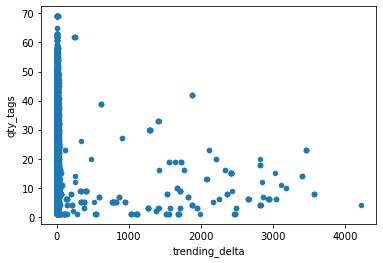

In [95]:
tmp = pd.DataFrame(us_df['trending_delta'].dt.days).join(us_df['qty_tags'])
tmp.plot.scatter('trending_delta', 'qty_tags')

Text(0.5, 1.0, '')

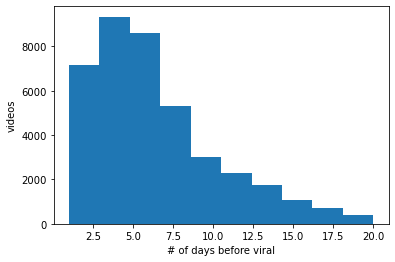

In [17]:
plt.hist(us_df['trending_delta'].dt.days, range=(1, 20))
plt.xlabel('# of days before viral')
plt.ylabel('videos')
plt.title('')

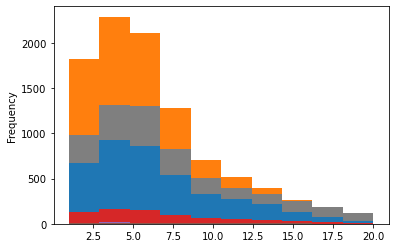

In [18]:
for c in list(us_df['category'].unique()):
    us_df[us_df['category'] == c]['trending_delta'].dt.days.plot.hist(range=(1, 20))

Text(0, 0.5, 'count')

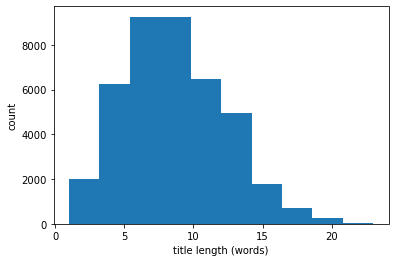

In [19]:
plt.hist(us_df['len_title'], bins=10, )
plt.xlabel('title length (words)')
plt.ylabel('count')